2440050874 - Michael Julian

In [ ]:
import os
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tqdm.auto import tqdm
from sklearn.decomposition import PCA

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
corpus = [
'Saya suka dengan makanan laut',
'Saya suka dengan minuman yang manis',
'Kemarin saya makan makanan laut',
'Hari ini saya makan makanan khas Sunda',
'Besok saya berencana makan makanan khas Betawi',
'Kemarin saya makan roti',
'Hari ini saya makan Pizza',
'Besok saya berencana makan Burger',
'Hari ini saya minum Coca Cola',
'Besok saya berencana minum kopi',
'Lusa saya berencana minum teh manis'
]

>Tokenize words on each sentences:

In [ ]:
sentences = [word_tokenize(sents.lower()) for sents in tqdm(corpus)]
sentences

  0%|          | 0/11 [00:00<?, ?it/s]

[['saya', 'suka', 'dengan', 'makanan', 'laut'],
 ['saya', 'suka', 'dengan', 'minuman', 'yang', 'manis'],
 ['kemarin', 'saya', 'makan', 'makanan', 'laut'],
 ['hari', 'ini', 'saya', 'makan', 'makanan', 'khas', 'sunda'],
 ['besok', 'saya', 'berencana', 'makan', 'makanan', 'khas', 'betawi'],
 ['kemarin', 'saya', 'makan', 'roti'],
 ['hari', 'ini', 'saya', 'makan', 'pizza'],
 ['besok', 'saya', 'berencana', 'makan', 'burger'],
 ['hari', 'ini', 'saya', 'minum', 'coca', 'cola'],
 ['besok', 'saya', 'berencana', 'minum', 'kopi'],
 ['lusa', 'saya', 'berencana', 'minum', 'teh', 'manis']]

# Word2Vec Model

In [ ]:
#Train Word2Vec Model using our corpus
model = Word2Vec(sentences, size=100, window=4, min_count=1, iter=52, sg=1)
w2v = model.wv

>Our Vocabs and Vectors

In [ ]:
w2v.index2word

['saya',
 'makan',
 'makanan',
 'berencana',
 'hari',
 'ini',
 'besok',
 'minum',
 'suka',
 'dengan',
 'laut',
 'manis',
 'kemarin',
 'khas',
 'minuman',
 'yang',
 'sunda',
 'betawi',
 'roti',
 'pizza',
 'burger',
 'coca',
 'cola',
 'kopi',
 'lusa',
 'teh']

In [ ]:
w2v.vectors

array([[ 3.0709649e-03,  3.0910778e-03,  4.4947793e-04, ...,
        -2.2821822e-03, -1.9568389e-03,  2.6224304e-03],
       [-5.2251231e-05,  3.2244283e-03, -4.8552114e-03, ...,
        -2.3795913e-03, -4.6891547e-03,  5.4118893e-04],
       [-3.1403957e-03, -1.7977889e-03, -3.6768320e-03, ...,
         3.0203073e-03, -4.8084636e-04, -1.1413947e-03],
       ...,
       [-1.7964949e-03, -4.5783460e-04, -4.4864370e-03, ...,
        -4.6985988e-03, -2.7421592e-03,  2.5052894e-03],
       [-2.1041692e-03,  2.1050470e-03, -4.0407400e-03, ...,
        -1.5831303e-03,  5.8788870e-04,  3.2014784e-03],
       [-5.0043231e-03, -4.7354467e-04, -4.2814240e-03, ...,
        -3.7170898e-03, -1.9310826e-03,  1.8638473e-03]], dtype=float32)

In [ ]:
w2v.vector_size

100

>Similar Words: semantically related

In [ ]:
w2v.similar_by_word("makan")

[('teh', 0.20991700887680054),
 ('roti', 0.13119488954544067),
 ('makanan', 0.12915575504302979),
 ('betawi', 0.12285085022449493),
 ('lusa', 0.11536605656147003),
 ('saya', 0.1061602309346199),
 ('besok', 0.0992307960987091),
 ('minuman', 0.07618580758571625),
 ('yang', 0.07392755895853043),
 ('kopi', 0.06295904517173767)]

In [ ]:
w2v.similar_by_word("minum")

[('minuman', 0.20203514397144318),
 ('coca', 0.185489222407341),
 ('ini', 0.18118292093276978),
 ('pizza', 0.14124946296215057),
 ('hari', 0.10521639138460159),
 ('suka', 0.07191593945026398),
 ('besok', 0.06250594556331635),
 ('saya', 0.05013998597860336),
 ('dengan', 0.0395670160651207),
 ('lusa', 0.03751610964536667)]

# Visualization

In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(15,15))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+.00008, y+.00008, word)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



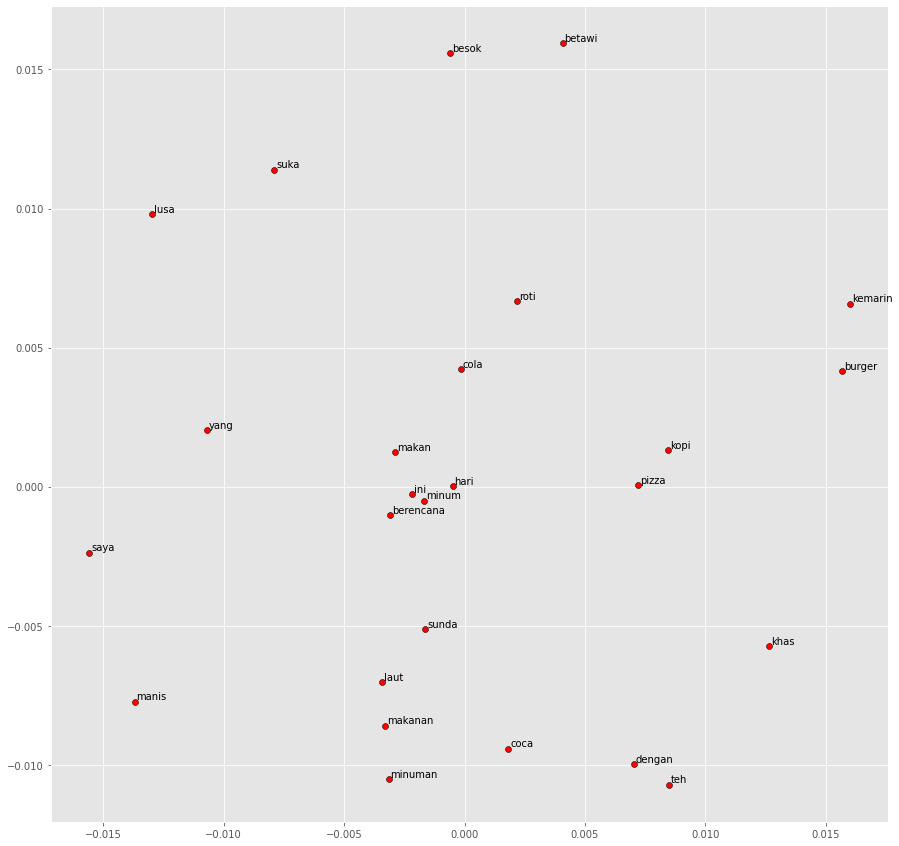

In [ ]:
display_pca_scatterplot(model, 
                        ['saya','makan','makanan','berencana','hari','ini','besok','minum','suka',
                         'dengan','laut','manis','kemarin','khas','minuman','yang','sunda','betawi',
                         'roti','pizza','burger','coca','cola','kopi','lusa','teh'])